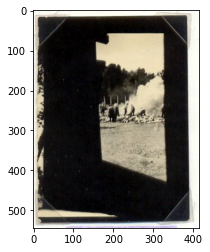

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import scipy 
scipy.version.full_version
import scipy.misc
from scipy import misc

# Load the image
#img = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P3\sonderkommando_photographs_280.png') 
img = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P3\sonderkommando_photographs_281.png') 
# Create a copy of the image
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)



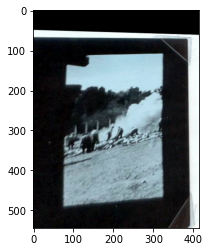

In [86]:
# to calculate the transformation matrix
input_img = np.float32([[169,37],[340,39],[190,378],[322,440]])
output_img = np.float32([[110,91],[340,92],[109,485],[310,485]])

# Compute the perspective transform M
transform_M = cv2.getPerspectiveTransform(input_img,output_img)

# Apply the perspective transformation to the image
res = cv2.warpPerspective(img,transform_M,(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)

# Display the transformed image
plt.imshow(res)

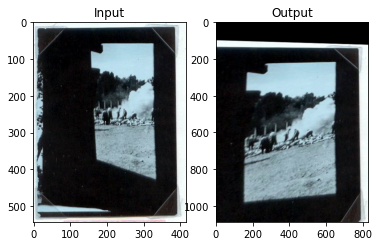

In [100]:
res = cv2.resize(res,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(121)
plt.title('Input')
plt.imshow(img)
plt.subplot(122)
plt.title('Output')
plt.imshow(res)

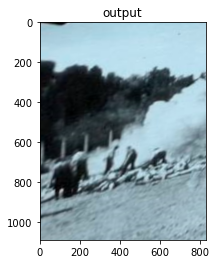

In [101]:
rows,cols,d = res.shape

transform_M = cv2.getRotationMatrix2D((cols/2,rows/2),-1,2)
dst = cv2.warpAffine(res,transform_M,(cols,rows))
plt.title('output')
plt.imshow(dst)


In [90]:
def guided_filter(p, I, r, e, same_shape=True):

    if not(same_shape):
        I = np.repeat(I[:, :, np.newaxis], 3, axis=2)

    # size of kernel
    r = 2 * r - 1
    # cv2.blur is a mean filter
    mean_I = cv2.blur(I,(r,r))
    mean_p = cv2.blur(p,(r,r))
    corr_I = cv2.blur(np.multiply(I,I),(r,r))
    corr_p = cv2.blur(np.multiply(I,p),(r,r))
    var_I = corr_I - np.multiply(mean_I,mean_I)
    cov_Ip = corr_p - np.multiply(mean_I,mean_p)
    a = np.divide(cov_Ip,(var_I+e))
    b = mean_p - np.multiply(a, mean_I)
    mean_a = cv2.blur(a,(r,r))
    mean_b = cv2.blur(b,(r,r))
    q = np.multiply(mean_a,I) + mean_b
    # In case that same_shape == False, we might get out of bounds a little
    q = np.clip(q, 0, 1)
    return q

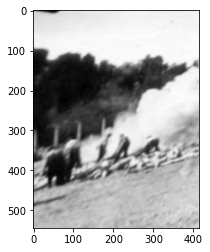

In [91]:
first_img = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)/255
guided_img = guided_filter(first_img,first_img,2,0.02)
plt.imshow(guided_img, cmap='gray')
plt.show()

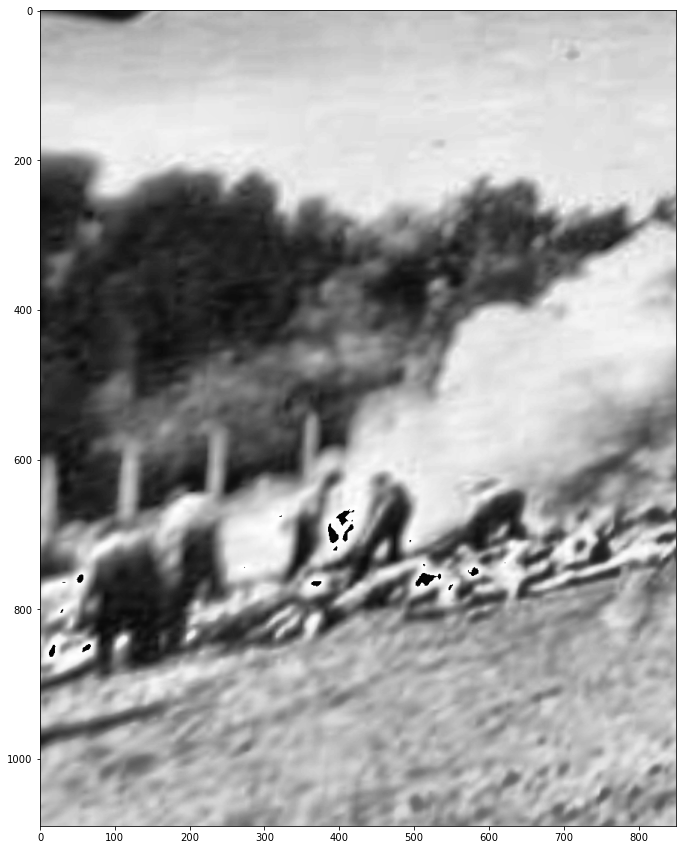

In [92]:
import cv2
import numpy as np
 
image = cv2.resize(dst, (850, 1090))
 
# The initial processing of the image
# image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
 
# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
clip = cv2.createCLAHE(clipLimit = 2)
final_img = clip.apply(image_bw) + 10
 
# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
 
# Showing all the three images
#plt.imshow(ordinary_img,cmap="gray")
plt.figure(figsize=(12, 15))
plt.imshow(final_img,cmap="gray")
#plt.imshow(cv2.cvtColor(ordinary_img,cv2.COLOR_BGR2RGB))

#cv2.imshow("CLAHE image", final_img)

In [93]:
def wgif(p, I, r, r2, e, same_shape=True):
    if not(same_shape):
        I = np.repeat(I[:, :, np.newaxis], 3, axis=2)

    # size of kernel
    r = 2 * r - 1
    r2 = 2 * r2 - 1
    # cv2.blur is a mean filter
    mean_I = cv2.blur(I,(r,r))
    mean_I2 = cv2.blur(I,(r2,r2))
    mean_p = cv2.blur(p,(r,r))
    corr_I = cv2.blur(np.multiply(I,I),(r,r))
    corr_I2 = cv2.blur(np.multiply(I,I),(r2,r2))
    corr_p = cv2.blur(np.multiply(I,p),(r,r))
    var_I = corr_I - np.multiply(mean_I,mean_I)
    var_I2 = corr_I2 - np.multiply(mean_I2, mean_I2)
    cov_Ip = corr_p - np.multiply(mean_I,mean_p)
    landa = (0.001*1)**2
    si = (1 / (p.shape[0] * p.shape[1]) ) * (var_I2 + landa) * np.sum(np.reciprocal(var_I2+ landa))
    a = np.divide(cov_Ip,(var_I+e/si))
    b = mean_p - np.multiply(a, mean_I)
    mean_a = cv2.blur(a,(r,r))
    mean_b = cv2.blur(b,(r,r))
    q = np.multiply(mean_a,I) + mean_b
    # In case that same_shape == False, we might get out of bounds a little
    return q


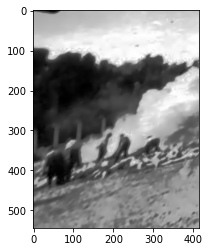

In [94]:
res_img = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

res_img = cv2.equalizeHist(res_img)/255
res_img = wgif(res_img, res_img,5,5, 0.1 ** 2)
plt.imshow(res_img,cmap="gray")
plt.show()

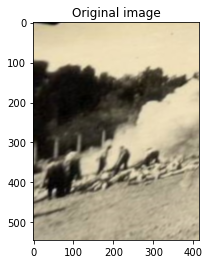

In [95]:
import cv2 as cv
from matplotlib import pyplot as plt
 
def Gaussian_demo(image):
    gaussian = cv.GaussianBlur(image,(5,5),1)
    return gaussian
 
def medianBulr(image):
    medianbulr = cv.medianBlur(image,5)
    return medianbulr

def blur_demo(image):
    blur = cv.blur(image,(3,3))
    return blur
 
def boxFilterF_demo(image):
    boxFilterF = cv.boxFilter(image,-1,(3,3),normalize=False)
    return boxFilterF
 
def boxFilter_demo(image):
    boxFilter = cv.boxFilter(image,-1,(3,3),normalize=True)
    return boxFilter

 
#src = cv.imread("the_magnificent_eleven_3.png")
src = dst[:,:,[2,1,0]]
first_img = blur_demo(src)
second_img = boxFilter_demo(src)
third_img = boxFilterF_demo(src)
fourth_img = Gaussian_demo(src)
fifth_img = medianBulr(src)

plt.title("Original image")
plt.imshow(first_img,cmap="gray")


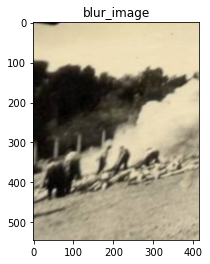

In [96]:
plt.title("blur_image")
plt.imshow(second_img,cmap="gray")

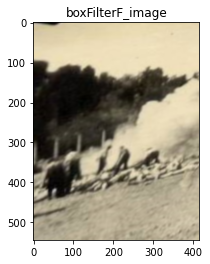

In [97]:
plt.title("boxFilterF_image")
plt.imshow(fourth_img,cmap="gray")

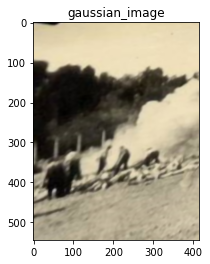

In [98]:
plt.title("gaussian_image")
plt.imshow(fifth_img,cmap="gray")

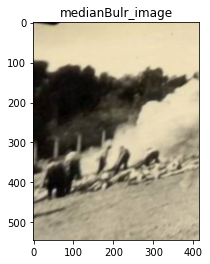

In [99]:
plt.title("medianBulr_image")
plt.imshow(fifth_img,cmap="gray")